Defining path for a Conglomerate Concrete Crack Detection Dataset

In [1]:
PATH = "./Dataset/Conglomerate Concrete Crack Detection"

Importing Necessary Libraries and Dependencies

In [2]:
!conda install glib=2.51.0 -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [3]:
!pip install tensorflow

In [4]:
!pip install matplotlib

In [5]:
!pip install tqdm

In [6]:
!pip install scikit-learn

In [7]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from sklearn.model_selection import train_test_split

2023-04-26 10:22:32.031913: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-26 10:22:32.484099: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-26 10:22:32.487308: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 10:22:34.365707: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Dataset Preparation

In [8]:
def load_data(PATH_images, PATH_masks):
    image_path = []
    for root, dirs, files in os.walk(PATH_images):
        # iterate over images
        for file in files:
            # create path
            path = os.path.join(root,file)
            # add path to list
            image_path.append(path)
    print('number of images: {}'.format(len(image_path)))

    # create a list to store images
    images = []
    # iterate over image paths
    for path in tqdm(image_path):
        # read file
        file = tf.io.read_file(path)
        # decode png file into a tensor
        image = tf.image.decode_image(file, channels=3, dtype=tf.uint8)
        # append to the list
        images.append(image)

    # a list to collect paths of masks
    mask_path = []
    for root, dirs, files in os.walk(PATH_masks):
        # iterate over masks
        for file in files:
            # obtain the path
            path = os.path.join(root,file)
            # add path to the list
            mask_path.append(path)
    print('number of masks: {}'.format(len(mask_path)))

    # create a list to store masks
    masks = []
    # iterate over mask paths
    for path in tqdm(mask_path):
        # read the file
        file = tf.io.read_file(path)
        # decode png file into a tensor
        mask = tf.image.decode_image(file, channels=1, dtype=tf.uint8)
        # append mask to the list
        masks.append(mask)

    return images, masks

In [9]:
PATH_Train_images = PATH + '/Train/images'
PATH_Train_masks = PATH + '/Train/masks'

PATH_Test_images = PATH + '/Test/images'
PATH_Test_masks = PATH + '/Test/masks'

train_images, train_masks = load_data(PATH_Train_images, PATH_Train_masks)
test_images, test_masks = load_data(PATH_Test_images, PATH_Test_masks)

number of images: 9899


100%|██████████| 9899/9899 [00:24<00:00, 397.84it/s]


number of masks: 9899


100%|██████████| 9899/9899 [00:06<00:00, 1633.04it/s]


number of images: 1096


100%|██████████| 1096/1096 [00:02<00:00, 384.44it/s]


number of masks: 1096


100%|██████████| 1096/1096 [00:00<00:00, 1623.83it/s]


Visualizing Dataset Samples

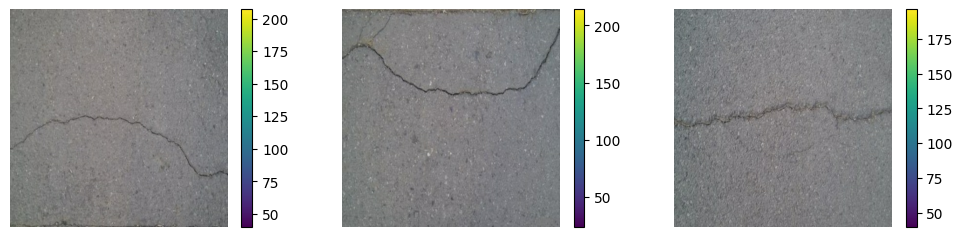

In [10]:
plt.figure(figsize=(25, 13))

# Iterate over the images in the range 4-6
for i in range(4, 7):
    # Create a subplot for each image
    plt.subplot(4, 6, i)
    # Get the i-th image from the list
    img = train_images[i]
    # Show the image with a colorbar
    plt.imshow(img)
    plt.colorbar()
    # Turn off the axis labels
    plt.axis('off')

# Display the figure
plt.show()

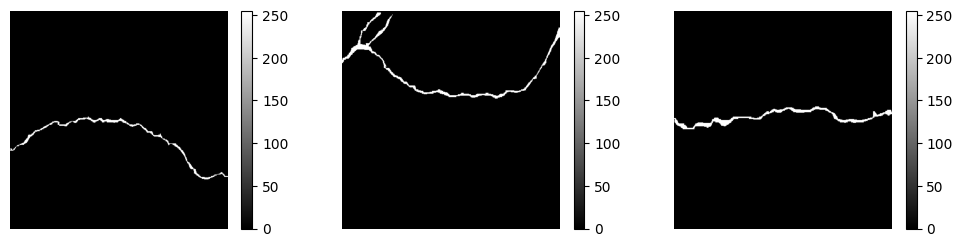

In [11]:
# Define a normalizer that can be applied while visualizing masks to have a consistency
NORM = mpl.colors.Normalize(vmin=0, vmax=255)

# plot masks
plt.figure(figsize=(25, 13))
for i in range(4, 7):
    plt.subplot(4, 6, i)
    img = train_masks[i]
    plt.imshow(img, cmap='gray', norm=NORM)
    plt.colorbar()
    plt.axis('off')
plt.show()

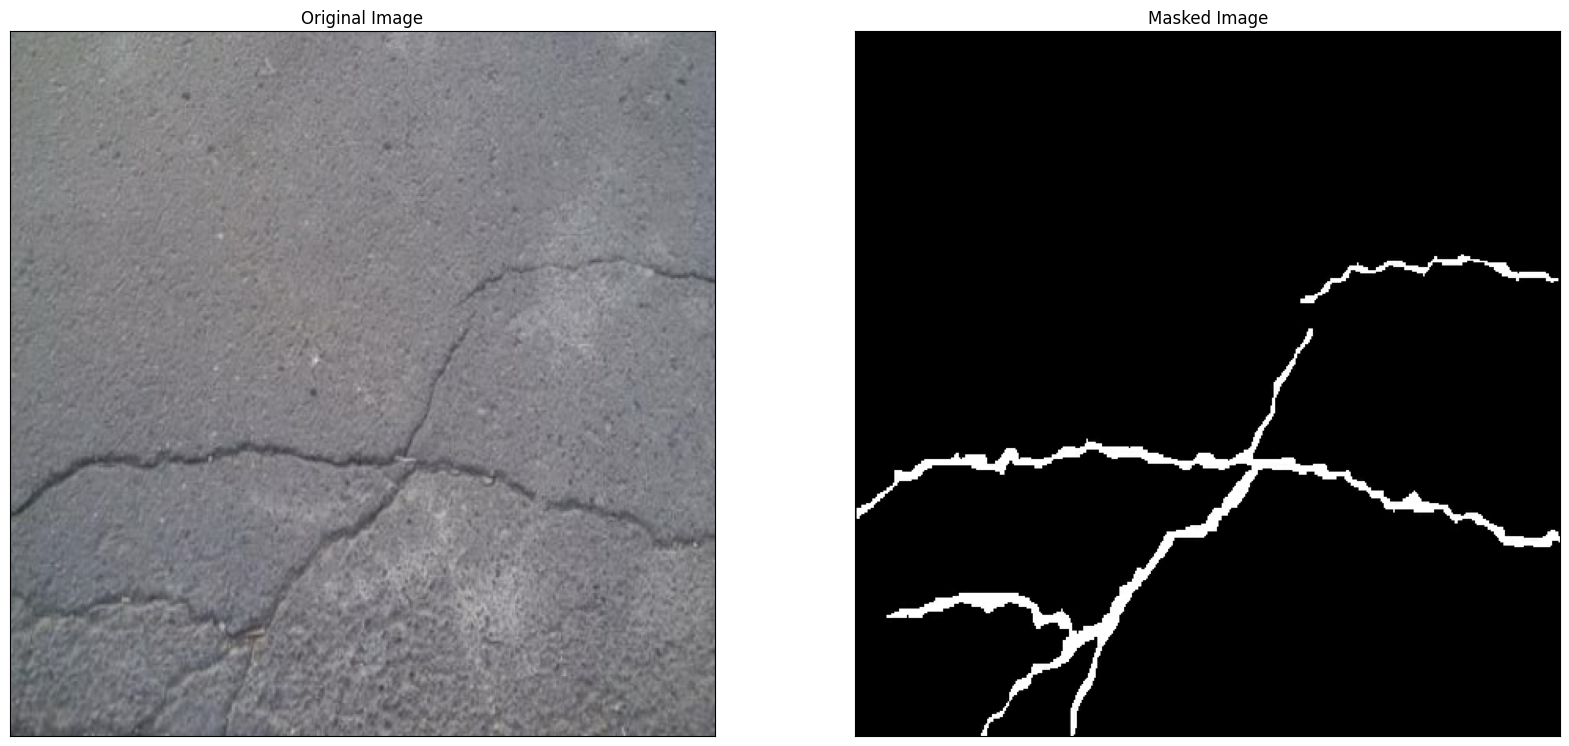

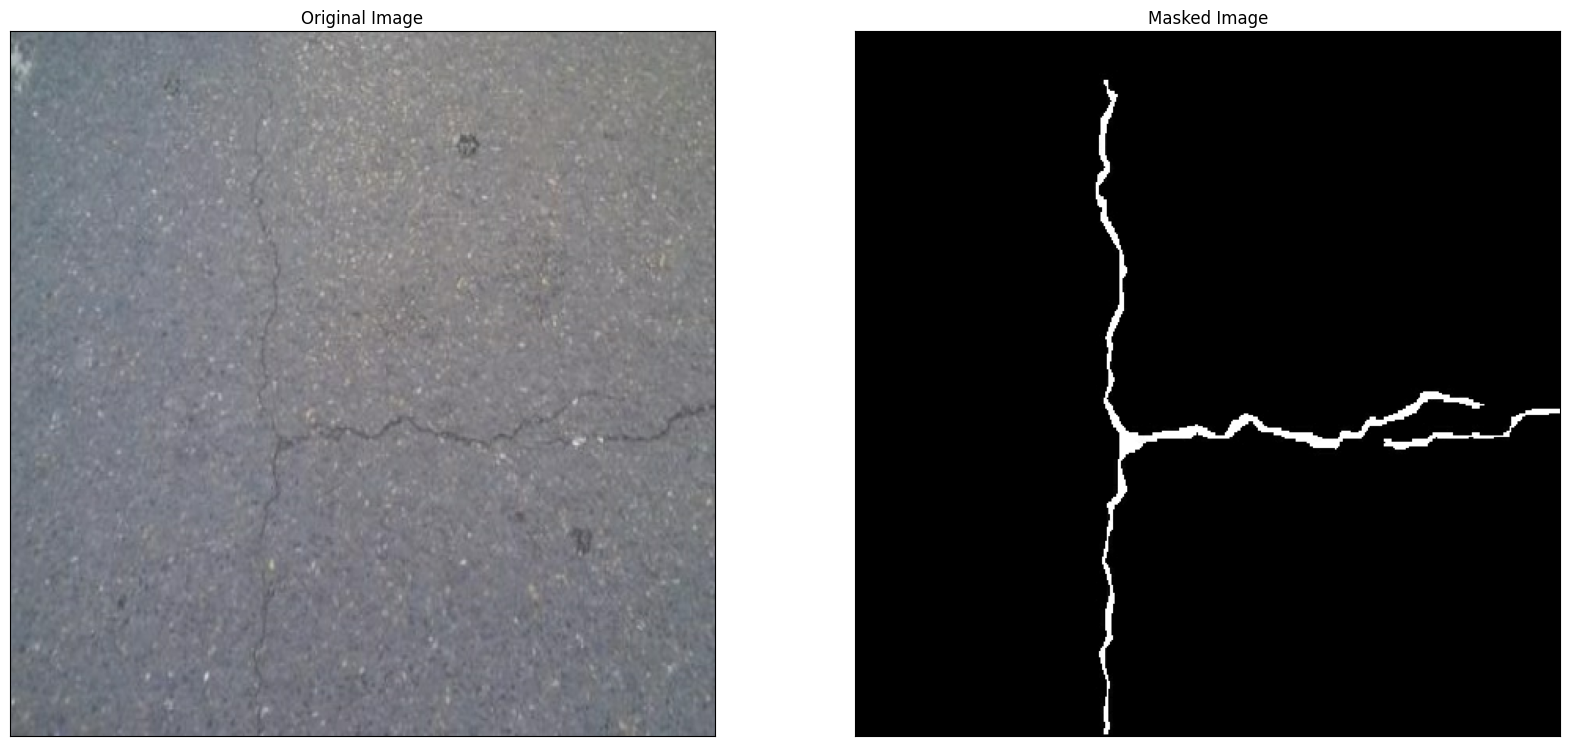

In [12]:
N = 2

for index in range(N):

    image = train_images[index]
    mask = train_masks[index]

    plt.figure(figsize=(20, 20))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.title("Masked Image")
    plt.imshow(tf.squeeze(mask), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

Data Preprocessing

In [13]:
#functions to resize the images and masks 
def resize_image(image):
    # scale the image
    image = tf.cast(image, tf.float32)
    image = image/255.0
    # resize image
    image = tf.image.resize(image, (128,128))

    #height, width = image.shape[0], image.shape[1]
    #height -=  height % 16
    #width -= width % 16
          
    #image = tf.image.resize(image, (height, width), method="nearest")

    return image

def resize_mask(mask):
    # resize the mask
    mask = tf.image.resize(mask, (128,128))
    mask = tf.cast(mask, tf.uint8)

    #height, width = image.shape[0], image.shape[1]
    #height -=  height % 16
    #width -= width % 16
    
    #mask = tf.image.resize(mask, (height, width), method="nearest")
    
    return mask    
     

X = [resize_image(i) for i in train_images]
y = [resize_mask(m) for m in train_masks]
len(X), len(y)

(9899, 9899)

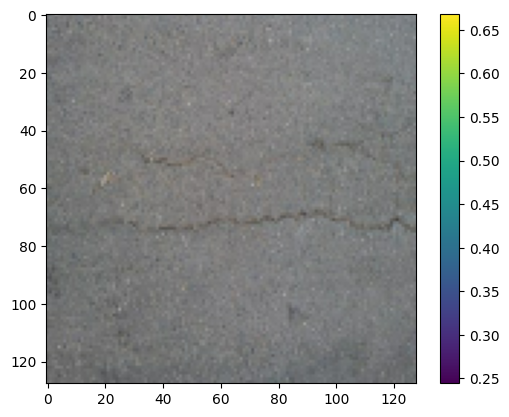

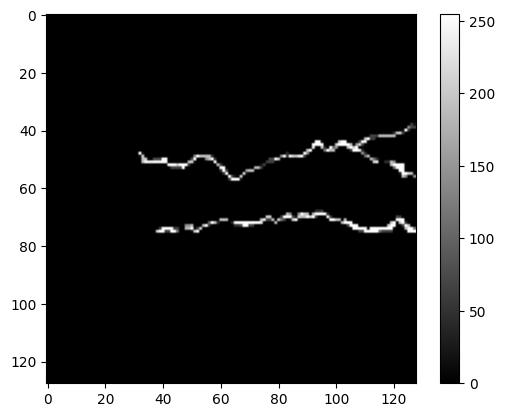

In [14]:
#visualizing a resized image and respective mask
# plot an image
plt.imshow(X[36])
plt.colorbar()
plt.show()

#plot a mask
plt.imshow(y[36], cmap='gray')
plt.colorbar()
plt.show()